In [1]:
# took from https://www.kaggle.com/code/manuscrits/create-a-validation-dataset-correcting-the-leak/notebook

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../data/"))

# Any results you write to the current directory are saved as output.

['sample_submission_v2.csv', 'train_v2', 'test_v2', 'train_ship_segmentations_v2.csv']


In [4]:
df = pd.read_csv("../data/train_ship_segmentations_v2.csv")
dfWtShipOnly = df.drop( df.index[df.EncodedPixels.apply(lambda x: not isinstance(x, str)).tolist()])

In [5]:
# Use rle and its position in the image as identifier of the image
dfWtShipOnly["rleAndPosition"] = dfWtShipOnly.EncodedPixels.apply(lambda x: ' '.join(x.split(" ")[1::2]) + ' ' + ' '.join([ str(int(hor) % 256) for hor in x.split(" ")[0::2]]) if (isinstance(x, str)) else x)
dfWtShipOnly.head()

,ImageId,EncodedPixels,rleAndPosition
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,17 33 33 33 33 33 33 33 33 33 33 33 33 33 33 3...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1 4 5 8 10 10 9 10 10 9 9 10 10 9 9 9 10 9 9 7...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,9 9 9 9 9 7 7 7 7 7 7 7 9 9 9 9 9 9 122 122 12...
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...,10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 1...
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...,1 1 1 1 1 1 1 131 131 131 131 131 131 131


In [6]:
#List in a new column all the ImageId where the 'rleAndPosition' occurs.
dfWtShipOnly["allSameRle"] = dfWtShipOnly["rleAndPosition"].apply(lambda x: dfWtShipOnly.ImageId[dfWtShipOnly["rleAndPosition"] == x].tolist())
dfWtShipOnly.head(10)

,ImageId,EncodedPixels,rleAndPosition,allSameRle
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,17 33 33 33 33 33 33 33 33 33 33 33 33 33 33 3...,"[000155de5.jpg, 07ae92b4f.jpg, 32018f9a6.jpg, ..."
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1 4 5 8 10 10 9 10 10 9 9 10 10 9 9 9 10 9 9 7...,"[000194a2d.jpg, 285c29528.jpg, 384765ab2.jpg, ..."
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,9 9 9 9 9 7 7 7 7 7 7 7 9 9 9 9 9 9 122 122 12...,"[000194a2d.jpg, 285c29528.jpg, 384765ab2.jpg, ..."
5,000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...,10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 1...,"[000194a2d.jpg, d3d5edcf0.jpg]"
6,000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...,1 1 1 1 1 1 1 131 131 131 131 131 131 131,"[000194a2d.jpg, 285c29528.jpg, 384765ab2.jpg, ..."
7,000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...,9 17 17 17 17 17 17 17 17 17 18 17 17 17 17 17...,"[000194a2d.jpg, d3d5edcf0.jpg]"
9,00021ddc3.jpg,108287 1 109054 3 109821 4 110588 5 111356 5 1...,1 3 4 5 5 6 7 8 9 10 11 12 12 13 14 14 14 15 1...,"[00021ddc3.jpg, 0efbf3431.jpg, f3cd16e96.jpg]"
10,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...,1 3 4 6 9 10 1 14 14 14 14 14 14 14 14 14 14 1...,"[00021ddc3.jpg, 0efbf3431.jpg, 23d9ae03d.jpg, ..."
11,00021ddc3.jpg,74441 3 75207 5 75975 5 76743 5 77511 5 78280 ...,3 5 5 5 5 4 5 5 5 5 5 6 5 5 5 2 201 199 199 19...,"[00021ddc3.jpg, 0efbf3431.jpg, 23d9ae03d.jpg, ..."
12,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...,4 4 4 4 3 3 4 4 4 4 4 204 204 204 204 205 205 ...,"[00021ddc3.jpg, 0efbf3431.jpg, 23d9ae03d.jpg, ..."


In [7]:
# Verify that 'rleAndPosition' values only occurs mainly a few times 
dfWtShipOnly["rleAndPosition"].value_counts().describe()

count    18996.000000
mean         4.302116
std          2.610800
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         15.000000
Name: count, dtype: float64

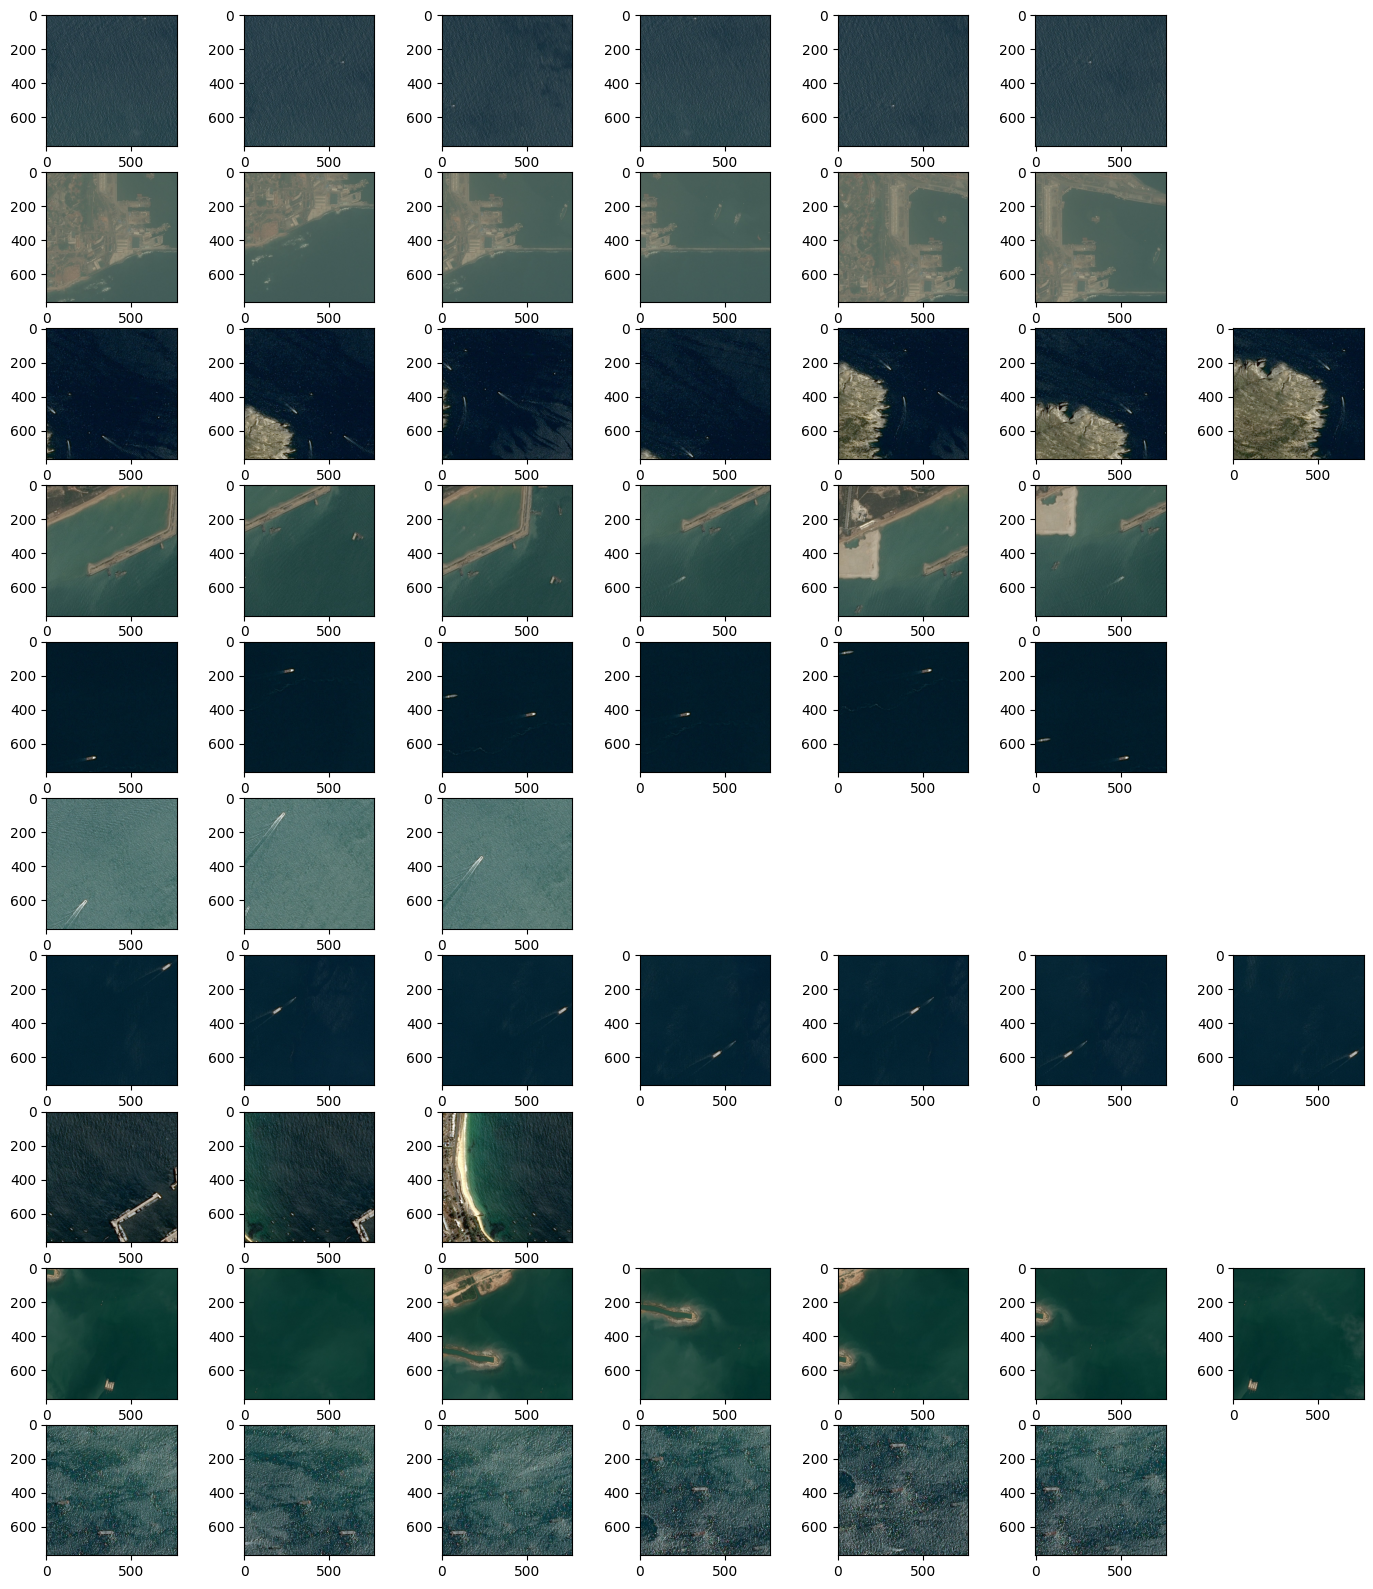

In [9]:
# Plot "allSameRle"

import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image

def get_image_data(image_id, image_type, **kwargs):
    img = _get_image_data_opencv(image_id, image_type, **kwargs)
    img = img.astype('uint8')
    return img

def _get_image_data_opencv(image_id, image_type, **kwargs):
    fname = "../data/train_v2/" + image_id
    img = cv2.imread(fname)
    assert img is not None, "Failed to read image : %s, %s" % (image_id, image_type)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

maxRepetition = 8
plt.figure(figsize=(20,20))
ImgNumber = 10
i = 0
for y in range(ImgNumber) :
    image_id = dfWtShipOnly["ImageId"].tolist()[np.random.randint(0,len(dfWtShipOnly))]
    img = get_image_data(image_id, 'Train')
    ID_list = dfWtShipOnly[dfWtShipOnly["ImageId"] == image_id]["allSameRle"].tolist()[0]
    if len(ID_list) > maxRepetition: ID_list = ID_list[0:maxRepetition-1]
    for ID in ID_list :
        i += 1
        img = get_image_data(ID, 'Train')
        plt.subplot(ImgNumber,maxRepetition,i)
        plt.imshow(img, cmap='binary')
    i = maxRepetition * (y+1)

In [10]:
# Group the 'rleAndPosition' by ImageId  
dfWtShipOnlyUnique = dfWtShipOnly.groupby('ImageId')['allSameRle'].apply(lambda x: set(x.sum())) 

In [11]:
print(len(df))
print(len(dfWtShipOnly))
print(len(dfWtShipOnlyUnique))

231723
81723
42556


In [13]:
print(len(dfWtShipOnlyUnique))
alreadyDropped = []
dfWtShipOnlyUniqueCopy = dfWtShipOnlyUnique.copy()

for itemKept in dfWtShipOnlyUnique.items():
    if itemKept[0] not in alreadyDropped:
        for itemToCheck in dfWtShipOnlyUnique.items():
            if (
                itemToCheck[0] in itemKept[1]
                and itemToCheck[0] not in alreadyDropped
                and itemToCheck[0] != itemKept[0]
            ):
                dfWtShipOnlyUnique = dfWtShipOnlyUnique.drop(itemToCheck[0])
                alreadyDropped.append(itemToCheck[0])

print(len(dfWtShipOnlyUnique))


42556
8635


In [14]:
# Splitting
trainDfWtShipOnlyUnique=dfWtShipOnlyUnique.sample(frac=0.9,random_state=768)
validationDfWtShipOnlyUnique=dfWtShipOnlyUnique.drop(trainDfWtShipOnlyUnique.index)

In [15]:
# Save the labels
allUniqLabels = dfWtShipOnly.loc[
    [
        True if ID in dfWtShipOnlyUnique.index else False
        for ID in dfWtShipOnly["ImageId"]
    ]
]
allUniqLabels.to_csv("../data_cleared/uniqueAllLabels.csv", index=True)
print(len(allUniqLabels))
trainUniqLabels = dfWtShipOnly.loc[
    [
        True if ID in trainDfWtShipOnlyUnique.index else False
        for ID in dfWtShipOnly["ImageId"]
    ]
]
trainUniqLabels.to_csv("../data_cleared/uniqueTrainLabels.csv", index=True)
print(len(trainUniqLabels))
validationUniqLabels = dfWtShipOnly.loc[
    [
        True if ID in validationDfWtShipOnlyUnique.index else False
        for ID in dfWtShipOnly["ImageId"]
    ]
]
validationUniqLabels.to_csv("../data_cleared/uniqueValidationLabels.csv", index=True)
print(len(validationUniqLabels))

15912
14236
1676
